In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pathlib

In [8]:
for dirpath, dirnames, filenames in os.walk("data/CIFAR-10-images/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'data/CIFAR-10-images/'.
There are 10 directories and 1 images in 'data/CIFAR-10-images/test'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/cat'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/dog'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/truck'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/bird'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/airplane'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/ship'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/frog'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/horse'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/deer'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test/automobile'.
There are 10 directories and 1 images in 'data/CIFAR-10-images/train'.
There are 0 di

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pathlib

# get class names from folders
data_dir = pathlib.Path("data/CIFAR-10-images/train/")  # turn our training path into a Python path

class_names = np.array(sorted(os.listdir(data_dir))) # TODO: create a list of class_names from the subdirectories
print(class_names, len(class_names))

['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck'] 10


In [12]:
# associate class names with numbers, machinelaerning and deeplearning works with numbers!
class_names_dict =  dict(enumerate(class_names)) # TODO: create the dictionary
len(class_names_dict), class_names_dict

(10,
 {0: 'airplane',
  1: 'automobile',
  2: 'bird',
  3: 'cat',
  4: 'deer',
  5: 'dog',
  6: 'frog',
  7: 'horse',
  8: 'ship',
  9: 'truck'})

In [21]:
import random
import matplotlib.image as mpimg


def display_random_img(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}")

    return img

Image shape: (32, 32, 3)


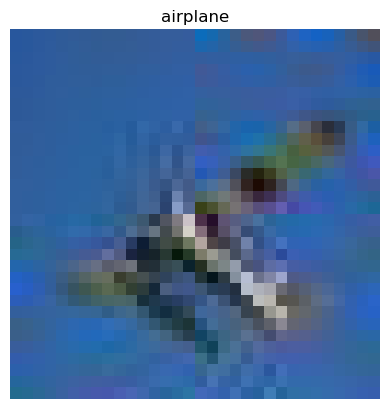

In [22]:
# Display a random image
img =  display_random_img(str(data_dir)+'/', class_names[0]) # TODO: Call display_random_img(target_dir, target_class) right here

Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)


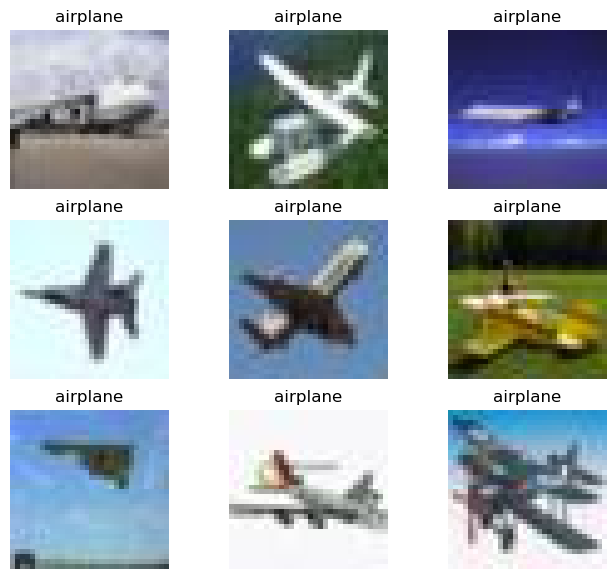

In [123]:
# Display multiple images from the data set
plt.figure(figsize=(8, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img =  display_random_img(str(data_dir)+'/', class_names[0]) # TODO: Call display_random_img(target_dir, target_class) right here (Care: pass the right target class!)
    plt.axis(False)

In [26]:
# TODO: Display image as array
image2array = np.asarray(img)

In [27]:
# TODO: Display image shape (Remember, the image datatype should be a Numpy Array -> https://numpy.org/doc/stable/reference/generated/numpy.shape.html)
np.shape(image2array)

(32, 32, 3)

In [51]:
def load_images_as_features_and_labels(target_dir, class_name_dictionary):
    """
    returns 
    X -- images as numpy array
    y -- labels as numpy array
    """

    # TODO: Add your code here
    
    for i in range(0, len(class_names_dict)):
        for filenames in os.walk(target_dir+class_names_dict[i]):
            #print(filenames)
            
            for file in filenames[2]: 
                image_path = pathlib.Path(filenames[0]+ '/' + file)
                X = (mpimg.imread(image_path))/255
                y = np.array(i)       
    
    return X, y
    
X_train, y_train = load_images_as_features_and_labels('data/CIFAR-10-images/train/', class_names_dict)
X_test, y_test = load_images_as_features_and_labels('data/CIFAR-10-images/test/', class_names_dict)

X_train, y_train, X_test, y_test

(array([[[0.98039216, 0.98431373, 0.95294118],
         [0.98039216, 0.98431373, 0.96078431],
         [0.99607843, 1.        , 0.99215686],
         ...,
         [0.96862745, 1.        , 0.98431373],
         [0.97647059, 1.        , 0.97254902],
         [0.96078431, 0.99215686, 0.93333333]],
 
        [[1.        , 1.        , 0.98039216],
         [0.98823529, 1.        , 0.97254902],
         [0.99607843, 1.        , 0.99215686],
         ...,
         [0.96078431, 0.99607843, 0.97647059],
         [0.97647059, 1.        , 0.96470588],
         [0.98431373, 1.        , 0.95686275]],
 
        [[0.99607843, 1.        , 0.98039216],
         [0.99607843, 1.        , 0.98431373],
         [0.97254902, 0.98823529, 0.98431373],
         ...,
         [0.97647059, 1.        , 0.99215686],
         [0.97647059, 1.        , 0.96470588],
         [0.97254902, 1.        , 0.95294118]],
 
        ...,
 
        [[0.8745098 , 0.87058824, 0.76078431],
         [0.96078431, 0.95686275, 0.87450